# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

In [130]:
# Write Your information in here
student_name = 'Janne Arkko'
student_id = 'AB3817'

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

In [131]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

In [132]:
# TODO: Preprocessing data

# read data into a dataframe
df = pd.read_csv('./data/voice.csv')

# rename columns to lowercase
df.columns = [col.lower() for col in df.columns]

# find and replace NaN values
nan_values = df.isna().any(axis=1)
nan_found = False
for value in nan_values:
    if value == bool(True):
        print(value)
        nan_found = True
if not nan_found:
    print('No NaN values present in the dataset')

# remove duplicates
df = df.drop_duplicates()
df

No NaN values present in the dataset


,meanfreq,sd,median,q25,q75,iqr,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [133]:
# scale data
scaler = StandardScaler()
df_to_scale = df.drop('label', axis=1)
scaled_data = scaler.fit_transform(df_to_scale)
scaled_data

array([[-4.04876256,  0.42701439, -4.22489401, ..., -1.43215231,
        -1.41987354, -1.45439877],
       [-3.8405579 ,  0.61129081, -3.99924689, ..., -1.41882294,
        -1.40653979, -1.01384025],
       [-3.46255325,  1.60326589, -4.09582101, ..., -1.42993075,
        -1.41765125, -1.06506799],
       ...,
       [-1.2981577 ,  2.32199421, -0.05123041, ..., -0.59906661,
        -0.58651445,  0.17585005],
       [-1.24458371,  2.0115303 , -0.01698008, ..., -0.41245542,
        -0.39984202,  1.14887975],
       [-0.51409363,  2.14695765, -0.07013968, ..., -1.27664298,
        -1.26431318,  1.47531538]])

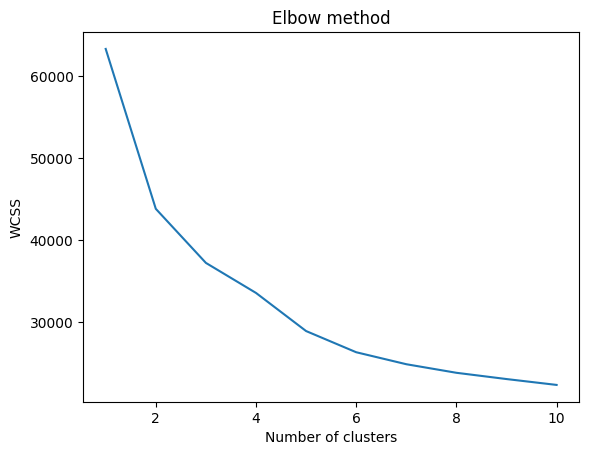

In [134]:
# find the most suitable number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

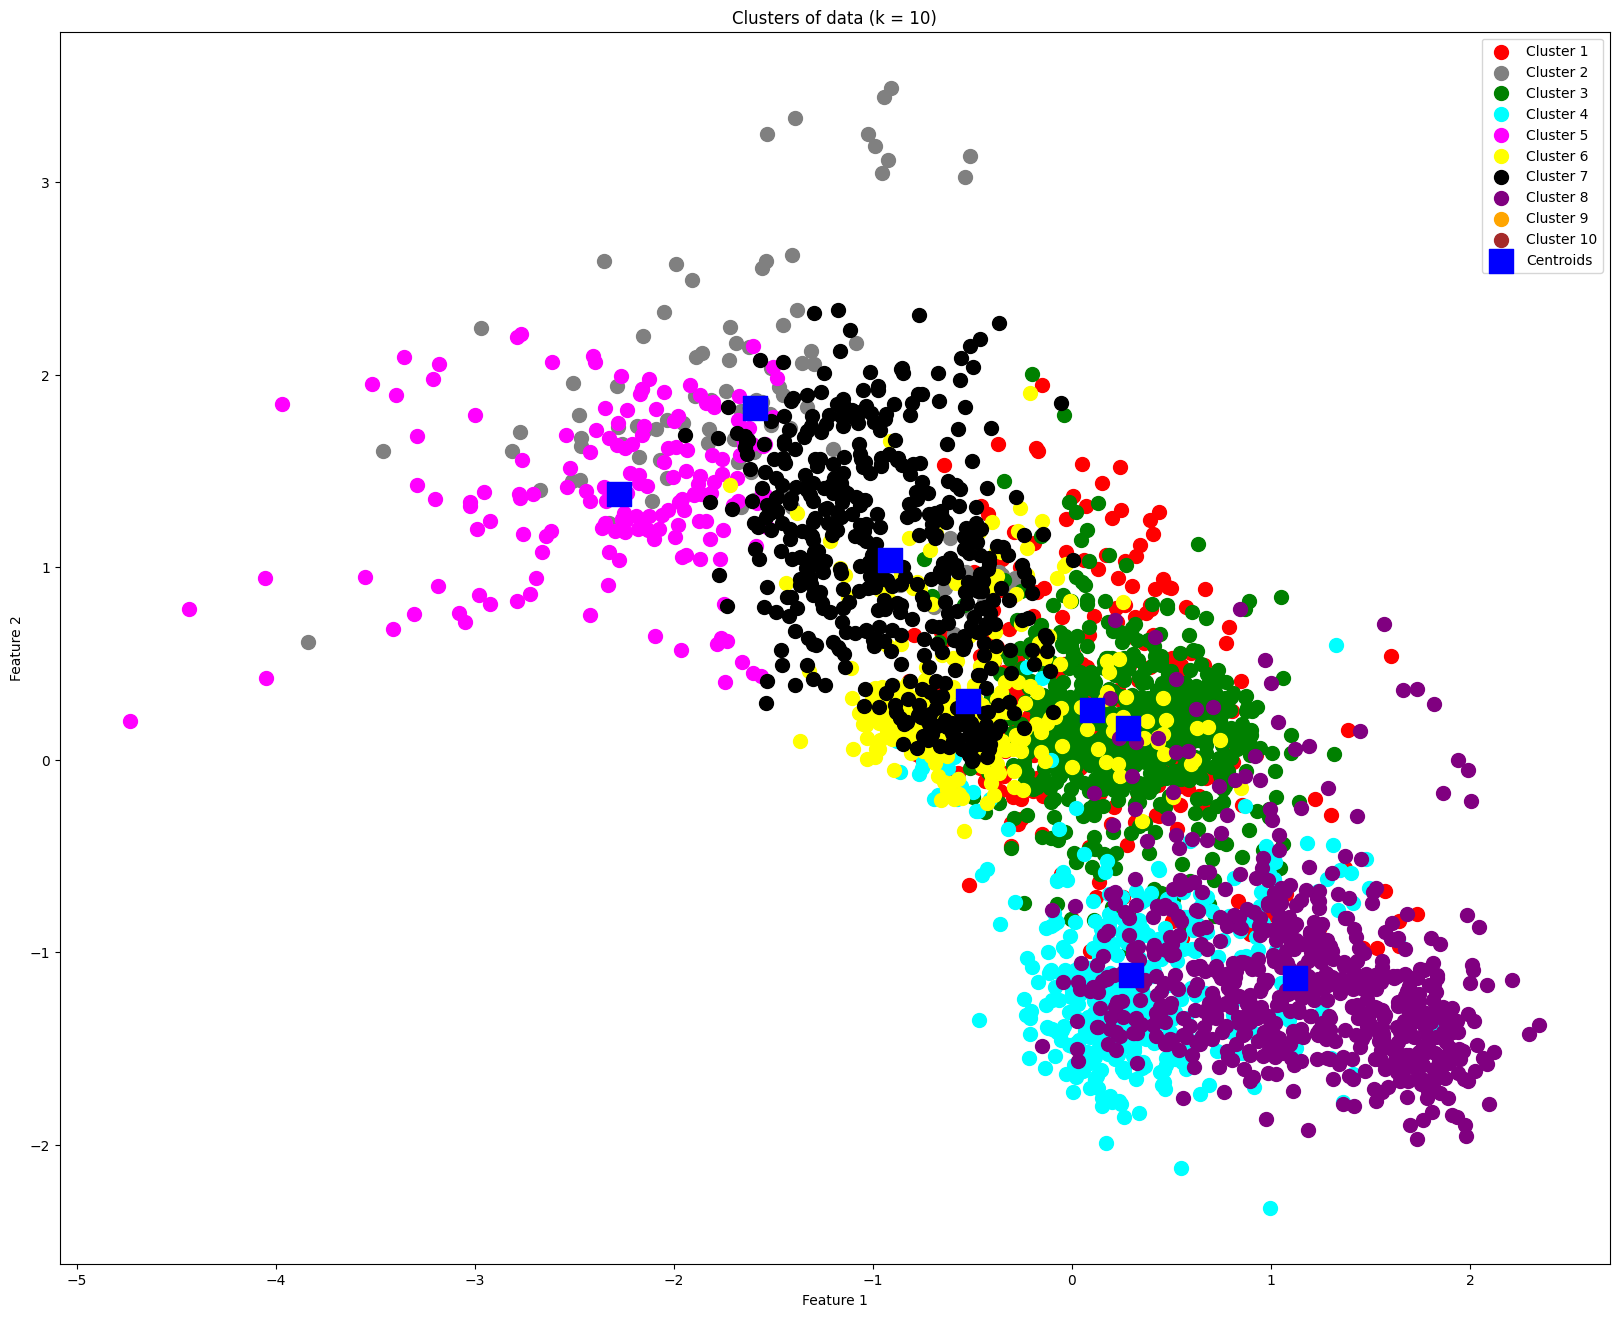

In [135]:
# apply kmeans clustering based on above elbow method
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)
df_to_scale['Cluster'] = y_kmeans
plt.figure(figsize=(20,16))

colors = ['red', 'grey', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
for i in range(10):
    plt.scatter(scaled_data[y_kmeans == i, 0], scaled_data[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids', marker='s')

plt.title('Clusters of data (k = 10)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

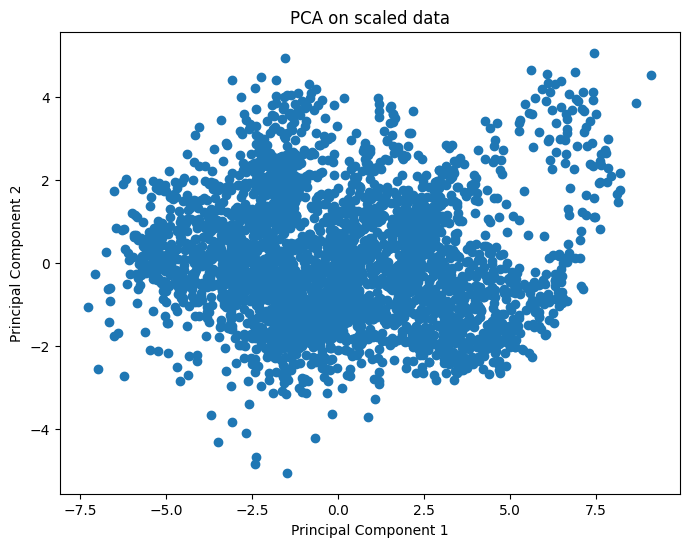

In [136]:
# use PCA to reduce dimensions and locate outliers better
pca = PCA(n_components=2)
pca_df = pd.DataFrame(data=(pca.fit_transform(scaled_data)), columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on scaled data')
plt.show()

In [137]:
# find and remove outlier point indexes from data
outliers_upper_i = pca_df[pca_df['PC1'] > 8].index # upper outliers in PC1
outliers_lower_i = pca_df[pca_df['PC2'] < -3.5].index # lower outliers in PC2

outlier_indexes = outliers_upper_i.union(outliers_lower_i)
outliers = df.iloc[outlier_indexes]
df_cleaned = df.drop(index=outlier_indexes)
df_cleaned

,meanfreq,sd,median,q25,q75,iqr,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


C:\Users\janne\AppData\Local\Temp\ipykernel_24944\2050419933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


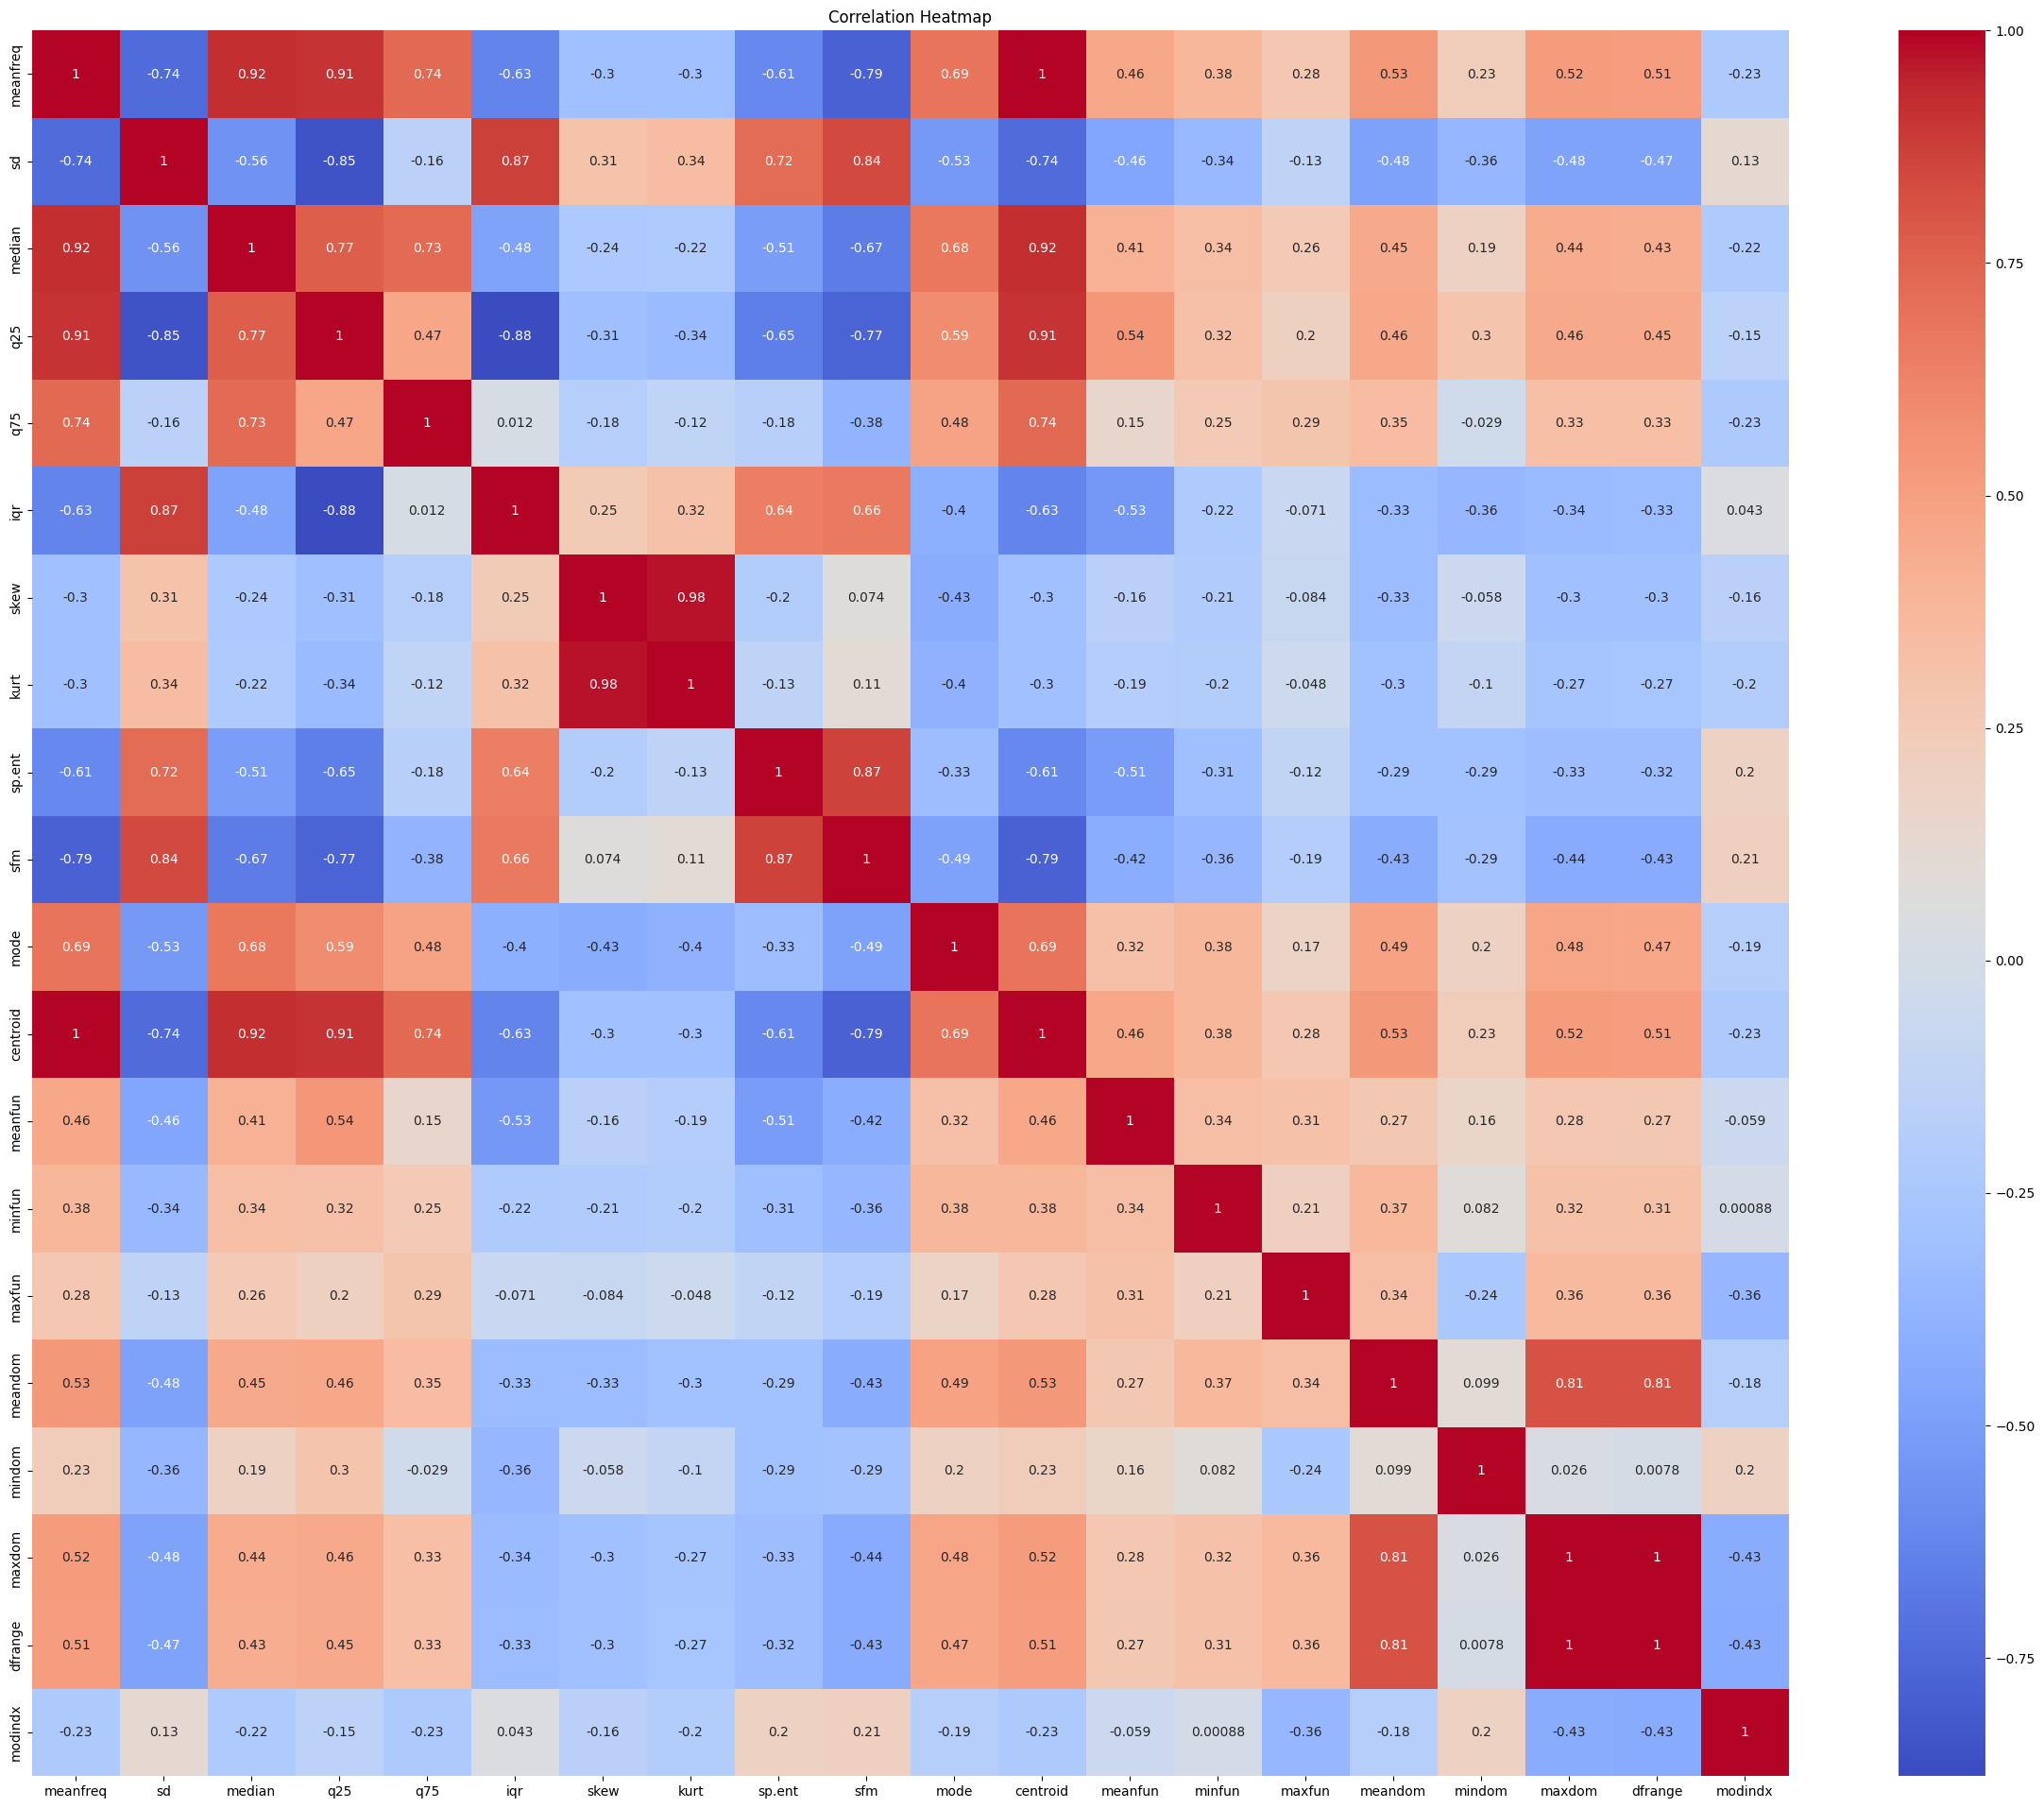

In [138]:
# finally, get the correlation of features
correlation_matrix = df_cleaned.corr()

# plot correlation heatmap
plt.figure(figsize=(30,24))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [139]:
# Find the highly correlated features
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
threshold = 0.6 # threshold for correlation value, altering this for best model performance
high_correlation_features = set() # make a set() to ensure no duplicates

# Find and store highly correlated pairs
for column in upper_tri.columns:
    high_corr_cols = upper_tri[column][upper_tri[column] > threshold].index.tolist()
    for row in high_corr_cols:
        # Add both features of the pair to the set
        high_correlation_features.update([row, column])

df_high_corr_cleaned = df_cleaned[high_correlation_features]
df_high_corr_cleaned

C:\Users\janne\AppData\Local\Temp\ipykernel_24944\4012586668.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_high_corr_cleaned = df_cleaned[high_correlation_features]


,sd,q25,skew,mode,median,iqr,q75,meandom,centroid,sp.ent,maxdom,sfm,meanfreq,dfrange,kurt
3,0.072111,0.096582,1.232831,0.083878,0.158011,0.111374,0.207955,0.201497,0.151228,0.963322,0.562500,0.727232,0.151228,0.554688,4.177296
4,0.079146,0.078720,1.101174,0.104261,0.124656,0.127325,0.206045,0.712812,0.135120,0.971955,5.484375,0.783568,0.135120,5.476562,4.333713
5,0.079557,0.067958,1.932562,0.112555,0.119090,0.141634,0.209592,0.298222,0.132786,0.963181,2.726562,0.738307,0.132786,2.718750,8.308895
6,0.074463,0.092899,1.530643,0.086197,0.160106,0.112819,0.205718,0.479620,0.150762,0.967573,5.312500,0.762638,0.150762,5.304688,5.987498
7,0.076767,0.110532,1.397156,0.128324,0.144337,0.121430,0.231962,0.301339,0.160514,0.959255,0.539062,0.719858,0.160514,0.531250,4.766611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.049285,1.762129,0.200836,0.153707,0.151859,0.201144,0.832899,0.131884,0.962934,4.210938,0.763182,0.131884,4.203125,6.630383
3164,0.089221,0.042718,0.693730,0.013683,0.076758,0.162193,0.204911,0.909856,0.116221,0.960716,3.679688,0.709570,0.116221,3.640625,2.503954
3165,0.095798,0.033424,1.876502,0.008006,0.183731,0.190936,0.224360,0.494271,0.142056,0.946854,2.937500,0.654196,0.142056,2.929688,6.604509
3166,0.090628,0.043508,1.591065,0.212202,0.184976,0.176435,0.219943,0.791360,0.143659,0.950436,3.593750,0.675470,0.143659,3.585938,5.388298


# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [140]:
# TODO: Splitting data

# Scale the data
minmax = MinMaxScaler()
scaled_clean_data = minmax.fit_transform(df_high_corr_cleaned)
df = pd.DataFrame(scaled_clean_data, columns=df_high_corr_cleaned.columns)

# modify label column to numerical
str_to_int = {'male': 0, 'female': 1}
df_high_corr_cleaned['label'] = df_cleaned['label'].copy()
df_high_corr_cleaned['label'] = df_high_corr_cleaned['label'].map(str_to_int)

columns_to_drop = ['label']
X = df_high_corr_cleaned.drop(columns=columns_to_drop)
y = df_high_corr_cleaned['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1550)

C:\Users\janne\AppData\Local\Temp\ipykernel_24944\1695051135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_corr_cleaned['label'] = df_cleaned['label'].copy()
C:\Users\janne\AppData\Local\Temp\ipykernel_24944\1695051135.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_corr_cleaned['label'] = df_high_corr_cleaned['label'].map(str_to_int)


# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


### Decision Tree

Accuracy of DecisionTree: 93.8 %.


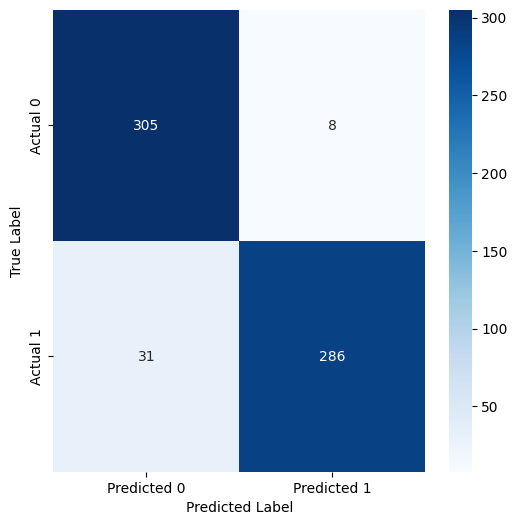

In [141]:
# TODO: Decision Tree classification implementation

dt_cls = DecisionTreeClassifier(max_depth=6, criterion='gini')
dt_cls.fit(X_train, y_train)
dt_y_pred = dt_cls.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_y_pred)
cm_dt = confusion_matrix(y_test, dt_y_pred)

print(f'Accuracy of DecisionTree: {round(accuracy_dt * 100, 1)} %.')

# plot DT
plt.figure(figsize=(6,6))
sns.heatmap(cm_dt,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

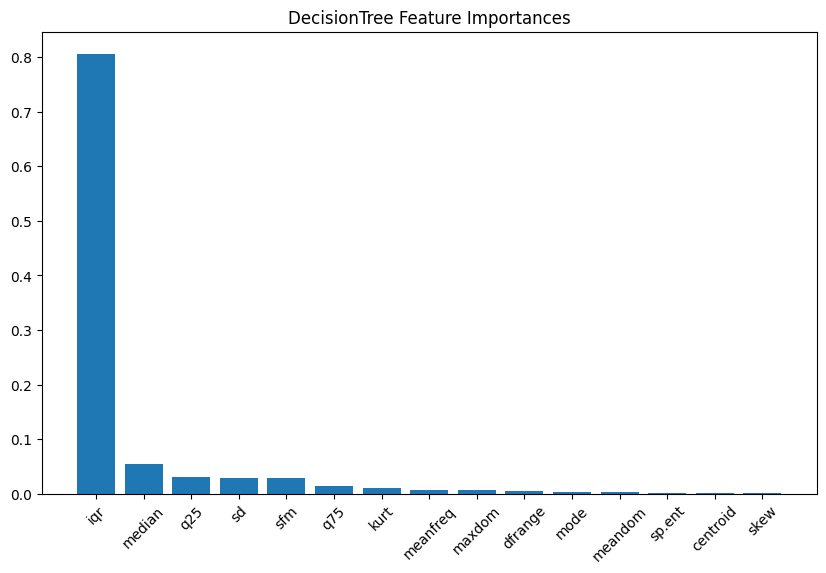

In [142]:
# TODO: Feature importances in Decision Tree classification
dt_feature_importances = dt_cls.feature_importances_

features_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importances
})

features_dt = features_dt.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('DecisionTree Feature Importances')
plt.bar(features_dt['Feature'], features_dt['Importance'])
plt.xticks(rotation=45)
plt.show()

### Support Vector Machine

C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear 

Accuracy of SVC: 88.6 %.


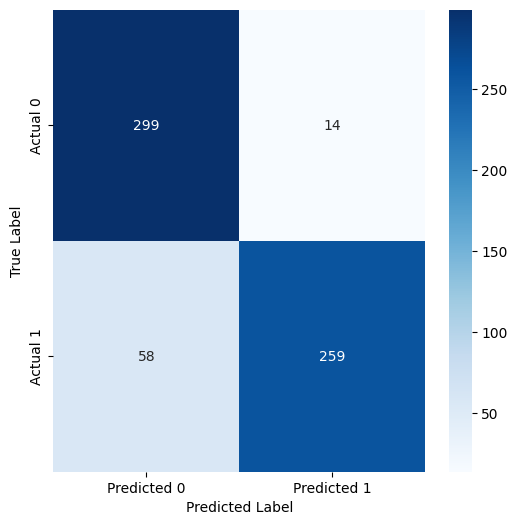

In [143]:
# TODO: SVC classification implementation

svc_cls = LinearSVC()
svc_calibrated = CalibratedClassifierCV(svc_cls) # the purpose of this calibrated class is only to be able to plot the roc curve and auc score!
svc_calibrated.fit(X_train, y_train)
svc_cls.fit(X_train, y_train) # this linear model is used for plotting the feature importances from coefficients as calibrated classifier has no such method.
svc_y_pred = svc_calibrated.predict(X_test)
svc_y_pred_2 = svc_cls.predict(X_test)

accuracy_svc = accuracy_score(y_test, svc_y_pred)

cm_svc = confusion_matrix(y_test, svc_y_pred)

print(f'Accuracy of SVC: {round(accuracy_svc * 100, 1)} %.')

# plot LinearSVC
plt.figure(figsize=(6,6))
sns.heatmap(cm_svc,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

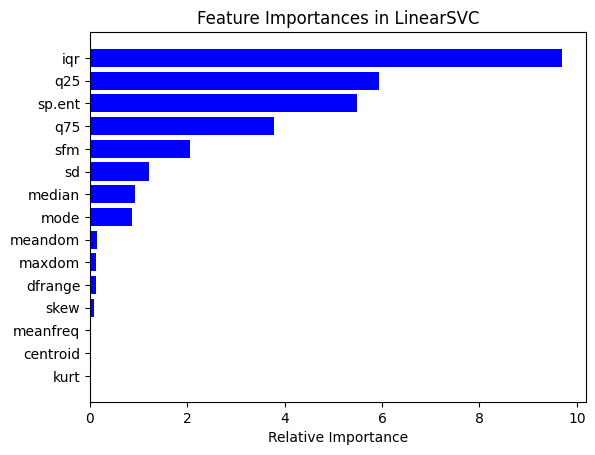

In [144]:
# Feature importances for LinearSVC
coefficients_svc = svc_cls.coef_[0]
importances_svc = np.abs(coefficients_svc)
i_svc = np.argsort(importances_svc)

plt.title('Feature Importances in LinearSVC')
plt.barh(range(len(i_svc)), importances_svc[i_svc], color='b', align='center')
plt.yticks(range(len(i_svc)), [X.columns[i] for i in i_svc])
plt.xlabel('Relative Importance')
plt.show()

### kNN

Accuracy of kNN: 70.6 %.


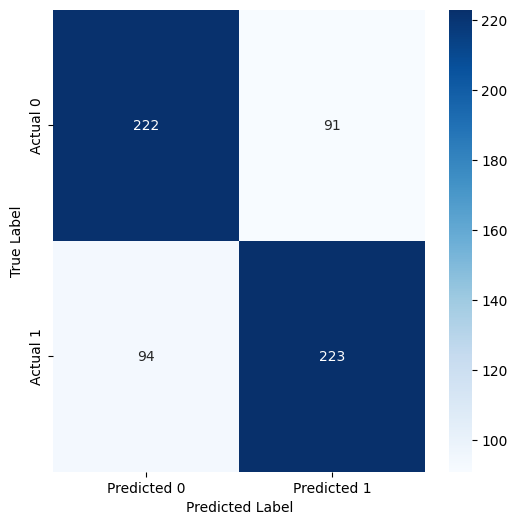

In [145]:
# TODO: kNN classification implementation

knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train, y_train)
knn_y_pred = knn_cls.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_y_pred)
cm_knn = confusion_matrix(y_test, knn_y_pred)

print(f'Accuracy of kNN: {round(accuracy_knn * 100, 1)} %.')

# plot kNN
plt.figure(figsize=(6,6))
sns.heatmap(cm_knn,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

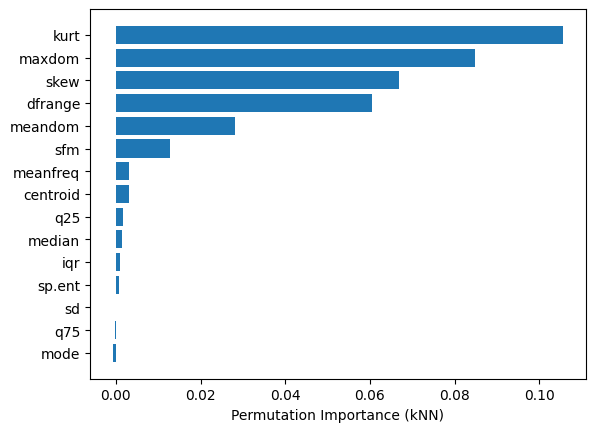

In [146]:
# Feature importances with kNN 

from sklearn.inspection import permutation_importance

perm_importance_knn = permutation_importance(knn_cls, X_test, y_test, n_repeats=10, random_state=42)
sorted_importances_knn = perm_importance_knn.importances_mean.argsort()

plt.barh(range(X_train.shape[1]), perm_importance_knn.importances_mean[sorted_importances_knn])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_importances_knn])
plt.xlabel("Permutation Importance (kNN)")
plt.show()

### Naive Bayes

Accuracy of Naive Gaussian: 80.2 %.


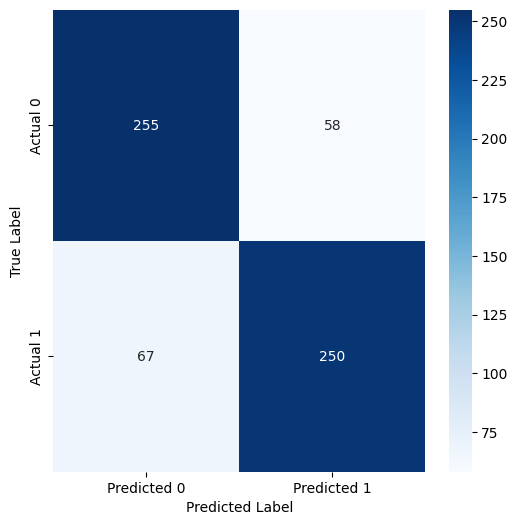

In [147]:
# TODO: Naive Bayes classification implementation

gnb_cls = GaussianNB()
gnb_cls.fit(X_train, y_train)
gnb_y_pred = gnb_cls.predict(X_test)

accuracy_gnb = accuracy_score(y_test, gnb_y_pred)
cm_gnb = confusion_matrix(y_test, gnb_y_pred)

print(f'Accuracy of Naive Gaussian: {round(accuracy_gnb * 100, 1)} %.')

# plot Naive Gaussian
plt.figure(figsize=(6,6))
sns.heatmap(cm_gnb,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

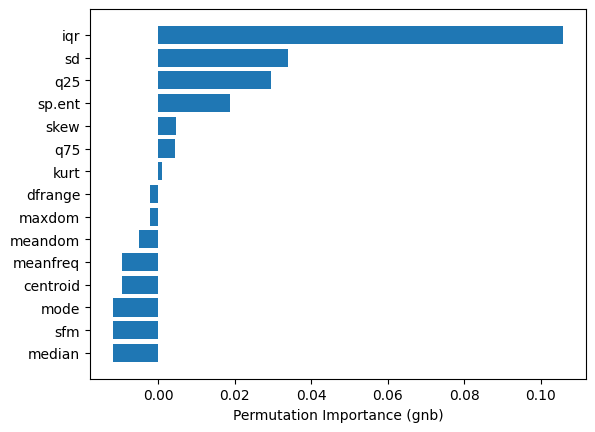

In [148]:
# Feature importances Naive Gaussian

perm_importance_gnb = permutation_importance(gnb_cls, X_test, y_test, n_repeats=10, random_state=42)

# Sorting features by importance
sorted_importances_gnb = perm_importance_gnb.importances_mean.argsort()

# Plotting
plt.barh(range(X_train.shape[1]), perm_importance_gnb.importances_mean[sorted_importances_gnb])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_importances_gnb])
plt.xlabel("Permutation Importance (gnb)")
plt.show()


### Random Forest

Accuracy of RFC: 96.3 %.


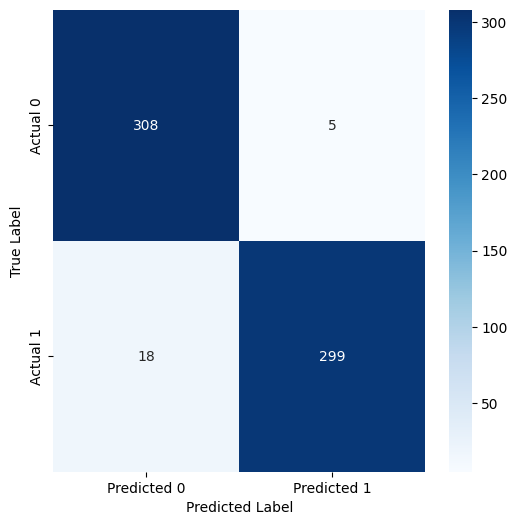

In [149]:
# TODO: Random Forest classification implementation

rfc_cls = RandomForestClassifier()
rfc_cls.fit(X_train, y_train)
rfc_y_pred = rfc_cls.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
cm_rfc = confusion_matrix(y_test, rfc_y_pred)

print(f'Accuracy of RFC: {round(accuracy_rfc * 100, 1)} %.')

# plot Naive Gaussian
plt.figure(figsize=(6,6))
sns.heatmap(cm_rfc,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

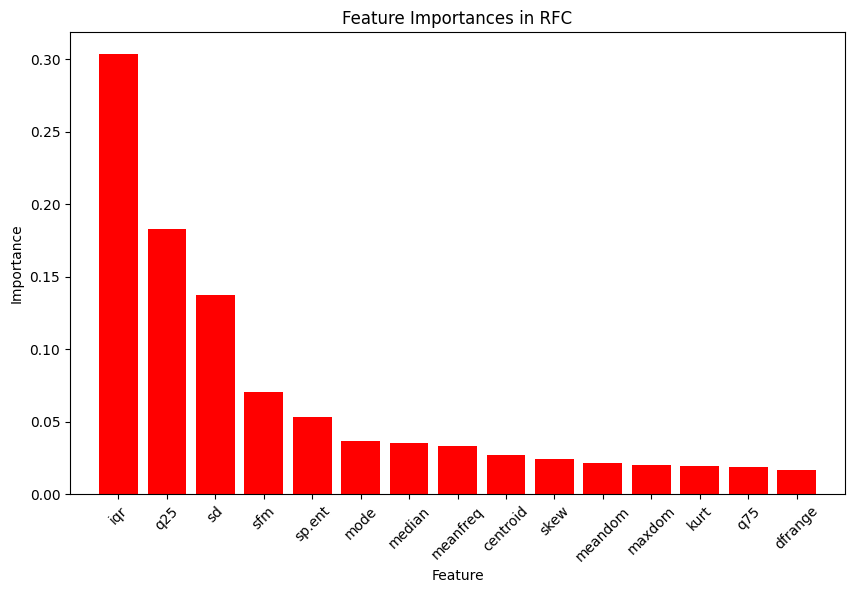

In [150]:
# Feature Importances RFC
importances_rfc = rfc_cls.feature_importances_
i_rfc = np.argsort(importances_rfc)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in RFC")
plt.bar(range(X_train.shape[1]), importances_rfc[i_rfc], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[i_rfc], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

Accuracy of RFC (pca): 95.9 %.


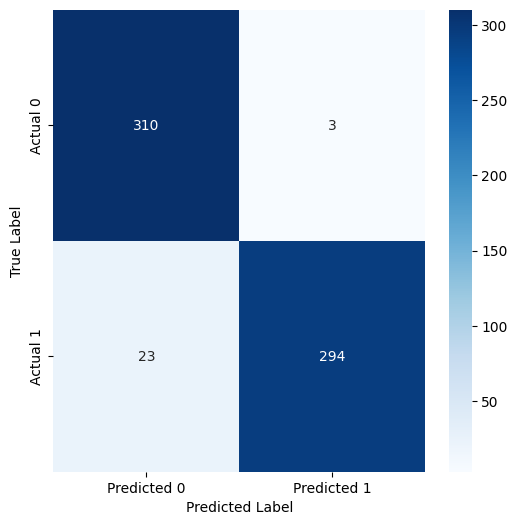

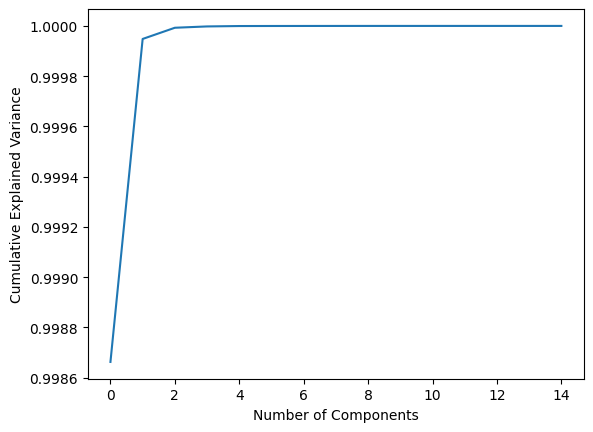

In [151]:
# TODO: PCA + selected Classifier

pca = PCA(n_components=15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rfc_cls_pca = RandomForestClassifier()
rfc_cls_pca.fit(X_train_pca, y_train)
rfc_y_pred_pca = rfc_cls_pca.predict(X_test_pca)

accuracy_rfc_pca = accuracy_score(y_test, rfc_y_pred_pca)
cm_rfc_pca = confusion_matrix(y_test, rfc_y_pred_pca)

print(f'Accuracy of RFC (pca): {round(accuracy_rfc_pca * 100, 1)} %.')

# Cm of PCA RFC
plt.figure(figsize=(6,6))
sns.heatmap(cm_rfc_pca,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the explained variance ratios to decide the number of PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
# result is confusing. With n_components I got 65% accuracy and with 10 components 95.7%. Which is weird as the curve suggests that after 
# > 2 n_components the less variance there is.

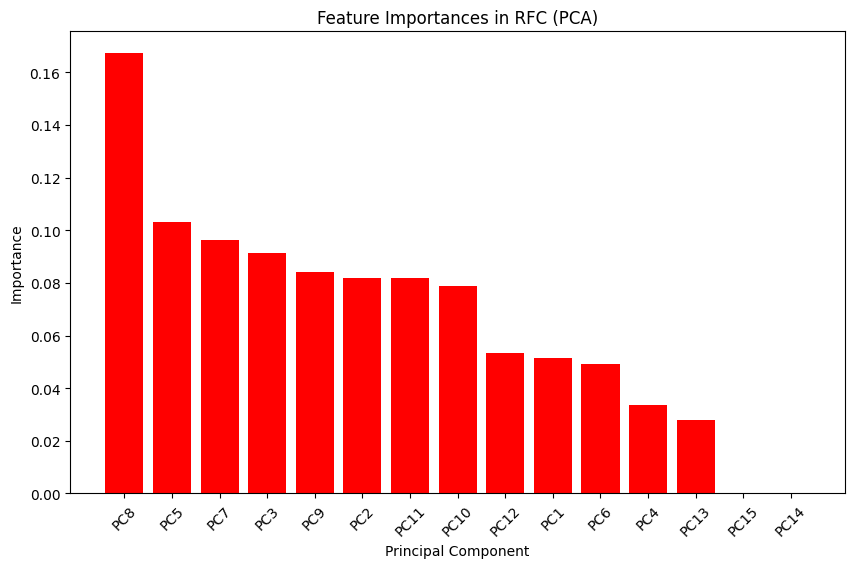

Text(0, 0.5, 'Mean Loading Value')

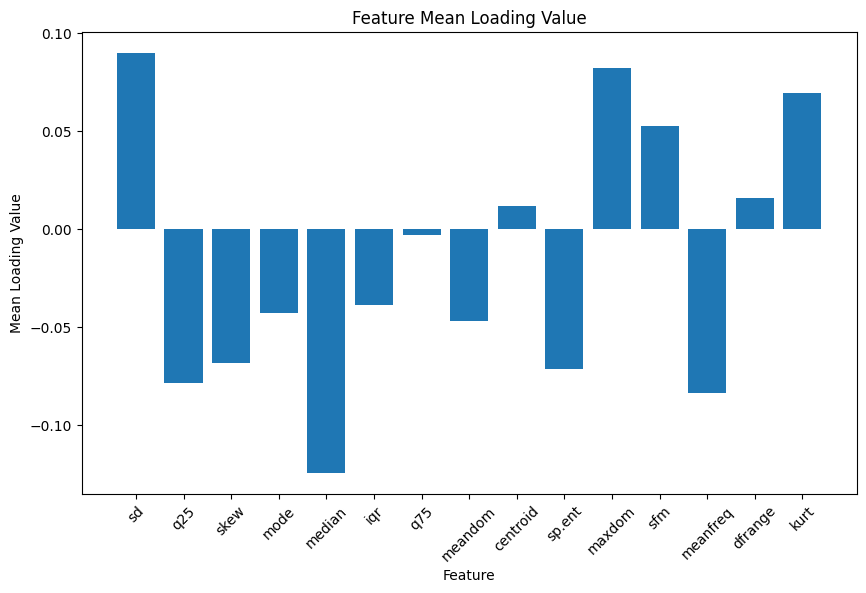

In [152]:
# Feature importances with PCA + RFC

importances_rfc_pca = rfc_cls_pca.feature_importances_
i_rfc_pca = np.argsort(importances_rfc_pca)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in RFC (PCA)")
plt.bar(range(len(importances_rfc_pca)), importances_rfc_pca[i_rfc_pca], color="r", align="center")
plt.xticks(range(len(importances_rfc_pca)), [f"PC{i+1}" for i in i_rfc_pca], rotation=45)
plt.xlabel("Principal Component")
plt.ylabel("Importance")
plt.show()

# Plot the component loadings/affection to each PC-point.

# Number of components to plot
num_components = pca.n_components_

# Calculate the mean of each feature affection into the loading.
mean_loadings = np.mean(pca.components_[:num_components], axis=0)

# Plotting the mean loadings
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_loadings)), mean_loadings, align='center')
plt.title('Feature Mean Loading Value')
plt.xticks(range(len(mean_loadings)), X.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Mean Loading Value')

### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

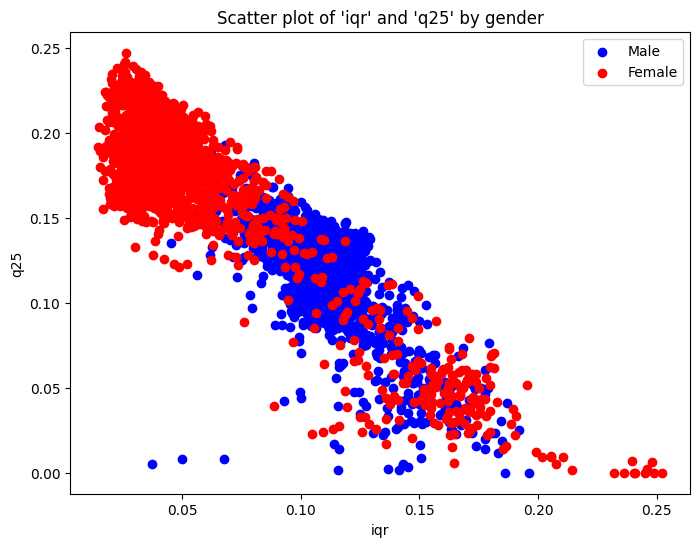

In [153]:
# TODO: Draw figure

# By looking at the graphs above, the two most important explanatory variables are 'iqr' and 'q25' depending on the interpretability.
# 'median' and 'sd' are close too.

male_data = df_cleaned[df_cleaned['label'] == 'male']
female_data = df_cleaned[df_cleaned['label'] == 'female']

plt.figure(figsize=(8,6))
plt.scatter(male_data['iqr'], male_data['q25'], color='blue', label='Male')
plt.scatter(female_data['iqr'], female_data['q25'], color='red', label='Female')
plt.title("Scatter plot of 'iqr' and 'q25' by gender")
plt.xlabel('iqr')
plt.ylabel('q25')
plt.legend()
plt.show()

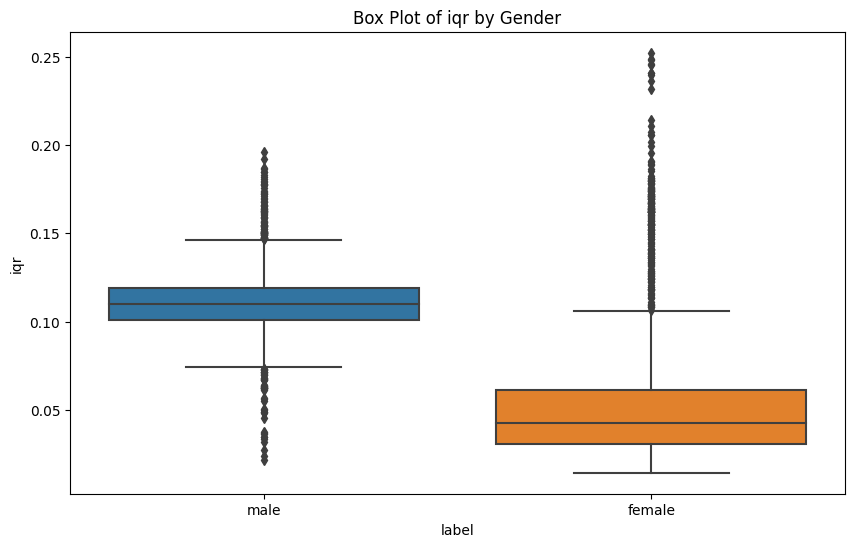

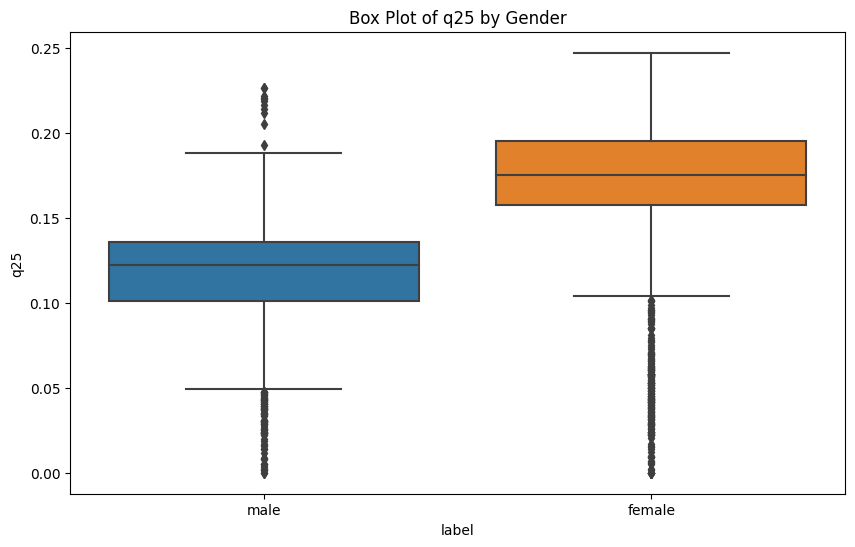

In [154]:
# TODO: Draw another figure

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='iqr', data=df_cleaned)
plt.title('Box Plot of iqr by Gender')

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='q25', data=df_cleaned)
plt.title('Box Plot of q25 by Gender')

plt.show()

# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


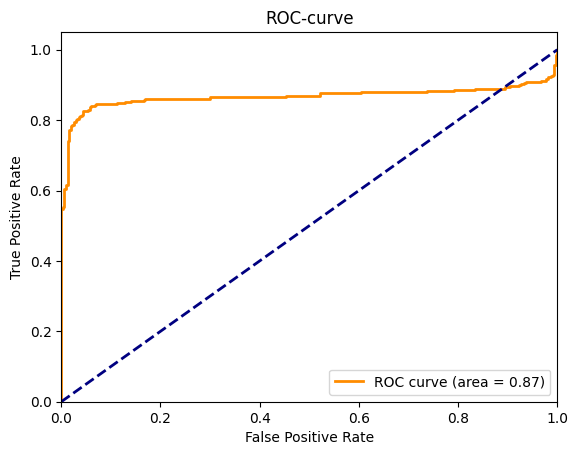

In [155]:
# TODO: ROC curve with SVM

y_scores_svc = svc_calibrated.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svc)
roc_auc = roc_auc_score(y_test, y_scores_svc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.show()

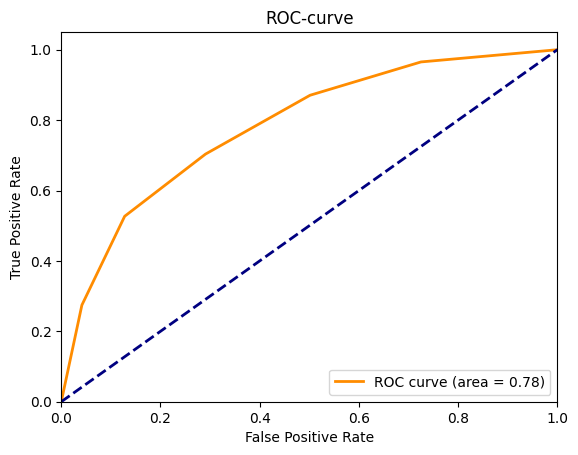

In [156]:
# TODO: ROC curve with kNN method

y_scores_knn = knn_cls.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = roc_auc_score(y_test, y_scores_knn)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.show()

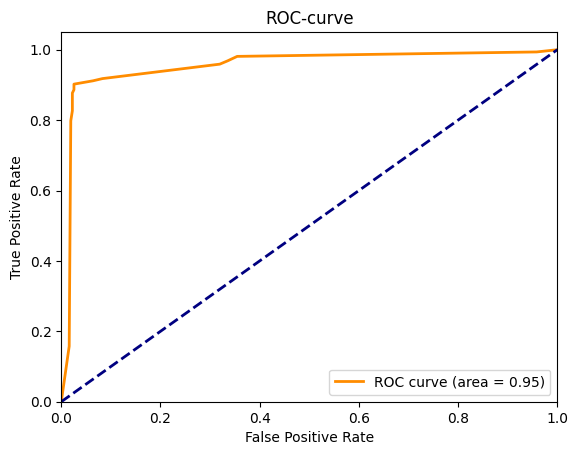

In [157]:
# TODO: ROC curve with decision tree method

y_scores_dt = dt_cls.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dt)
roc_auc = roc_auc_score(y_test, y_scores_dt)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.show()

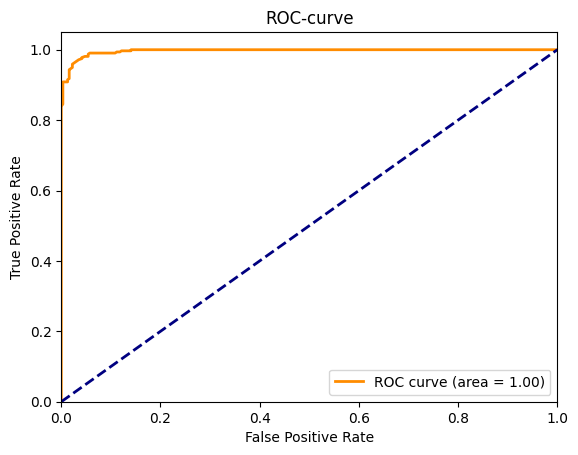

In [158]:
# TODO: ROC curve with random forest method

y_scores_rfc = rfc_cls.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rfc)
roc_auc = roc_auc_score(y_test, y_scores_rfc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.show()

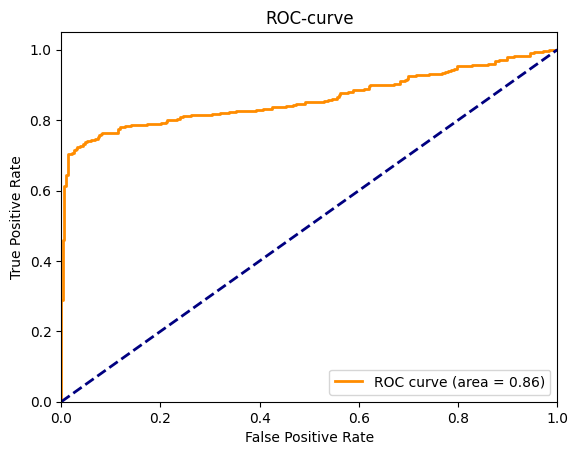

In [159]:
# TODO: ROC curve with Bayes method

y_scores_gnb = gnb_cls.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_gnb)
roc_auc = roc_auc_score(y_test, y_scores_gnb)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.show()

# Analysis

### Intro:

This was a fun exercise. Preprocessing is hard and time consuming when you look the data with completely fresh eyes and have practically no idea what the explanatory variables actually are and what they measure. So dropping out "unnecessary columns" is quite a challenge, because you don't know what variables are actually unnecessary. But I tried my best to find the outliers and only take the variables into account that had the highest correlacy between each other.

Modeling was a straightforward job, with some little nyances between models but in the end everything worked quite fine.

### Performance:

Accuracies of models:
- Decision Tree 93,8%
- LinearSVC 88,6%
- kNN 70,6%
- Naive Bayes 80,2%
- RFC 96,2%
- RFC (PCA) 95,7%

The best performance out of all models was with the Random Forest Classifier with an accuracy of 96,2%. 

ROC-curves and AUC-scores also follow the trend in terms of performance across the models.

### Explanatory variables:

There were quite big variance in terms of the most important variables between models. Some models, like the kNN, made decisions based on completely different explanatory variables than the most models. The four most used variables were 'iqr', 'median', 'q25' and 'sd'. Some models ranked one or two out of the four higher than the other models but looking at the graphs shows that out of all the 'iqr' and 'q25' were the most important ones across all models on average.

### Possible modeling improvements:

- Decision Tree
    - Prune the tree by limiting the depth
    - Preprocessing the data even further and choosing only the most informative features

- Linear SVC
    - Probably try to use some different standardization algorithms
    - Tune hyperparameters even further. Could even loop different sets of hyperparameters to find the best ones.

- kNN
    - Trying out different distance metrics

- Naive Bayes
    - Try different model variants

- RFC
    - Tuning hyperparameters could yield even better results

- RFC (PCA)
    - Adjusting number of components used in PCA could improve performance
    - Inverse transform